# **Pronóstico de la propagación de la emergencia Sanitaria del Dengue en Panama**


---


***Media Móvil | Forecast | Series de Tiempo***


1. **IMPORTACIÓN DE LIBRERIAS**

In [1]:
from logging import warning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


2. **CARGA DE EL DATAFILE DONDE ESTA CONTENIDO LOS CASOS DEL DENGUE**
    **POR SEMANA Y AÑO**

In [2]:
df = pd.read_csv('/content/df_dengue_pty.csv')
#Mostrando un preview de la data contenida en el archivo
#df.head()
df

,epiweek,anio,denguecases
0,1,2023,140
1,2,2023,118
2,3,2023,133
3,4,2023,106
4,5,2023,156
...,...,...,...
81,82,2024,1272
82,83,2024,1348
83,84,2024,270
84,85,2024,1326


**MOSTRANDO LA INFORMACIÓN INICIAL**

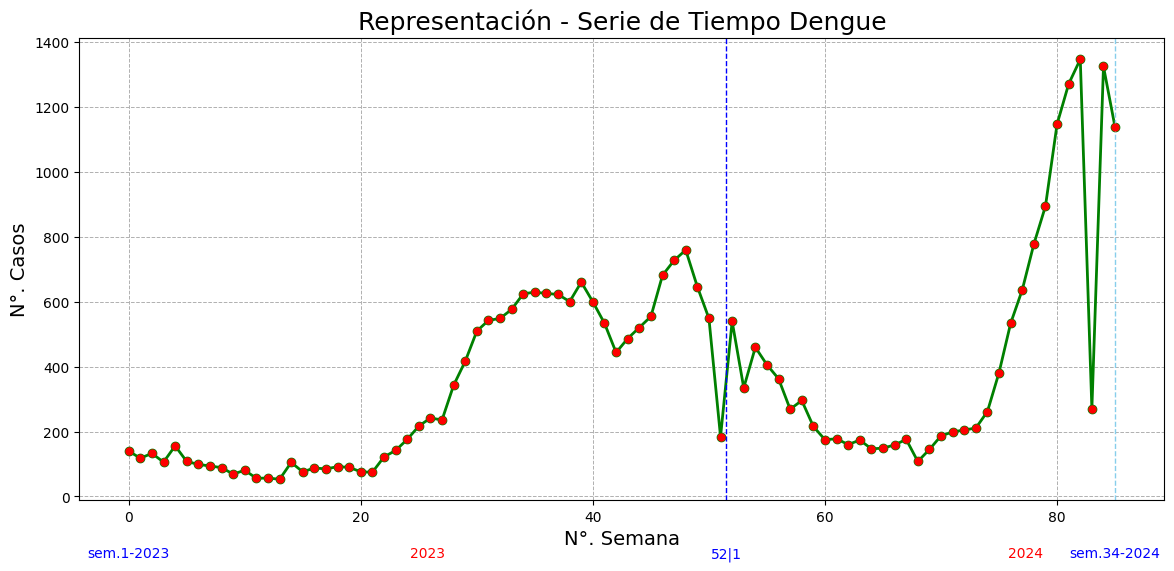

In [3]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['denguecases'],'-o', color='green' ,linewidth=2)

# Encontrar el índice final del año 2023 y el índice inicial del año 2024
last_index_2023 = df[df['anio'] == 2023].index[-1]
first_index_2024 = df[df['anio'] == 2024].index[0]

# Calcular la posición central entre ambos índices
transition_index = (last_index_2023 + first_index_2024) / 2
transition_index1 = transition_index / 2
transition_index2 = transition_index + transition_index1

# Añadir línea vertical en la posición central
plt.axvline(x=transition_index, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=85, color='skyblue', linestyle='--', linewidth=1)

# Ajustar las posiciones de las etiquetas para que estén en la parte inferior del gráfico
plt.text(transition_index1 , plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2023', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index2, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2024', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '52|1', color='blue', ha='center', va='top', fontsize=10)
plt.text(0, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.1-2023', color='blue', ha='center', va='top', fontsize=10)
plt.text(85, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.34-2024', color='blue', ha='center', va='top', fontsize=10)

plt.xlabel("N°. Semana", fontsize=14)
plt.ylabel("N°. Casos", fontsize=14)
plt.title("Representación - Serie de Tiempo Dengue", fontsize=18)
plt.scatter(df.index, df['denguecases'], color='red', s=25, zorder=5)

plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.show()



**`Convierto las columnas a valor numerico para manipularlas`**

In [4]:
df['epiweek'] = pd.to_numeric(df['epiweek'], errors='coerce')
df['anio'] = pd.to_numeric(df['anio'], errors='coerce')
df

,epiweek,anio,denguecases
0,1,2023,140
1,2,2023,118
2,3,2023,133
3,4,2023,106
4,5,2023,156
...,...,...,...
81,82,2024,1272
82,83,2024,1348
83,84,2024,270
84,85,2024,1326


# Modelo de Promedio Movil | libreria de PANDAS

In [5]:
#Creo una columna Movil Average(MA)
#Promedio Movil que seria el calculo de Nivel (Lt)

#d_anual['MA']=d_anual['value'].rolling(window=3).mean().shift(1) #calculo el promedio con mean del periodo movil
#tomo el promedio de los tres primeros y los coloco en el 4to (salto)
#d_anual
#df_dengue = df
#df_dengue
df['MA']=df['denguecases'].rolling(window=3).mean().shift(1) #calculo el promedio con mean del periodo movil
d_dengue=df



#epiweek	anio	denguecases

In [6]:
d_dengue

,epiweek,anio,denguecases,MA
0,1,2023,140,NaN
1,2,2023,118,NaN
2,3,2023,133,NaN
3,4,2023,106,130.333333
4,5,2023,156,119.000000
...,...,...,...,...
81,82,2024,1272,940.333333
82,83,2024,1348,1105.000000
83,84,2024,270,1256.000000
84,85,2024,1326,963.333333


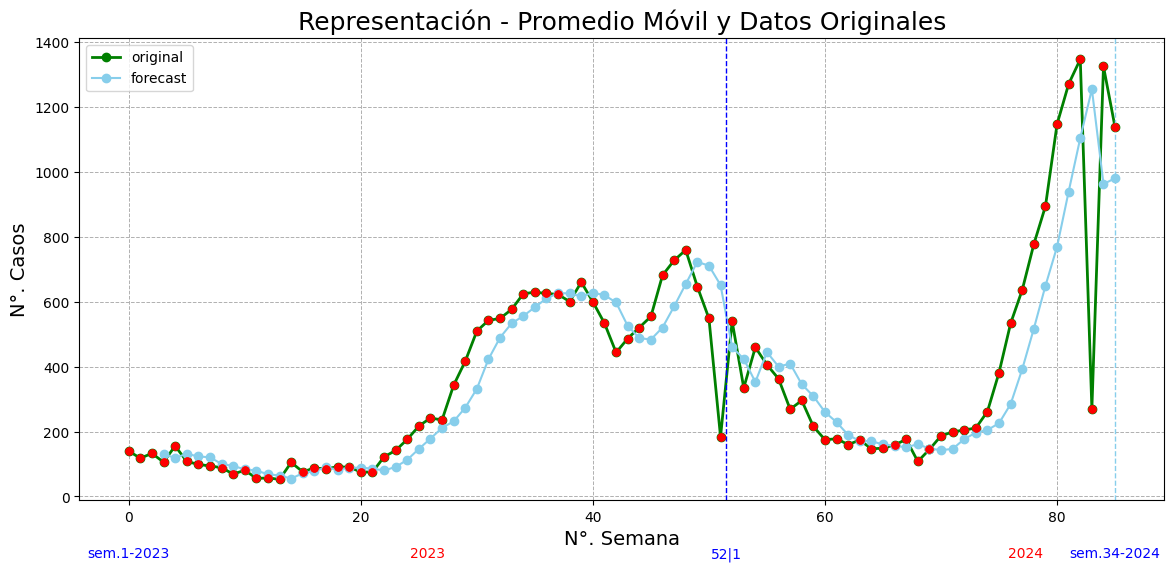

In [7]:

plt.figure(figsize=(14, 6))
plt.plot(d_dengue.index, d_dengue['denguecases'],'-o', color='green' ,linewidth=2, label='original')
plt.plot(d_dengue.index, d_dengue['MA'],'-o',  color='skyblue', label='forecast')

# Encontrar el índice final del año 2023 y el índice inicial del año 2024
last_index_2023 = d_dengue[d_dengue['anio'] == 2023].index[-1]
first_index_2024 = d_dengue[d_dengue['anio'] == 2024].index[0]

# Calcular la posición central entre ambos índices
transition_index = (last_index_2023 + first_index_2024) / 2
transition_index1 = transition_index / 2
transition_index2 = transition_index + transition_index1

# Añadir línea vertical en la posición central
plt.axvline(x=transition_index, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=85, color='skyblue', linestyle='--', linewidth=1)

# Ajustar las posiciones de las etiquetas para que estén en la parte inferior del gráfico
plt.text(transition_index1 , plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2023', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index2, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2024', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '52|1', color='blue', ha='center', va='top', fontsize=10)
plt.text(0, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.1-2023', color='blue', ha='center', va='top', fontsize=10)
plt.text(85, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.34-2024', color='blue', ha='center', va='top', fontsize=10)

plt.xlabel("N°. Semana", fontsize=14)
plt.ylabel("N°. Casos", fontsize=14)
plt.title("Representación - Promedio Móvil y Datos Originales", fontsize=18)
plt.scatter(d_dengue.index, d_dengue['denguecases'], color='red', s=25, zorder=5)
plt.scatter(d_dengue.index, d_dengue['denguecases'], color='red', s=25, zorder=5)


plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend(loc='best')
plt.show()




In [8]:
#df_dr = d_dengue[['epiweek','denguecases', 'MA']]
#df_dr.loc[len(df_dr)]=[int(df_dr.iloc[len(df_dr)-1][0])+1,0,0]
#df_dr
#d_dengue = pd.DataFrame(data)

# Seleccionar las columnas deseadas
df_dr = d_dengue[['epiweek', 'denguecases', 'MA']]
new_row = pd.DataFrame([[df_dr['epiweek'].iloc[-1] + 1, 0, 0]], columns=df_dr.columns)

# Concatenar el DataFrame original con la nueva fila
df_dr = pd.concat([df_dr, new_row], ignore_index=True)

df_dr

,epiweek,denguecases,MA
0,1,140,NaN
1,2,118,NaN
2,3,133,NaN
3,4,106,130.333333
4,5,156,119.000000
...,...,...,...
82,83,1348,1105.000000
83,84,270,1256.000000
84,85,1326,963.333333
85,86,1138,981.333333


In [9]:
#d_anual['MA']=d_anual['value'].rolling(window=3).mean().shift(1)

#d_anual['year']=d_anual['year'].astype(int)
#d_anual['value']=d_anual['value'].astype(float)
#d_anual['MA']=d_anual['MA'].astype(float)
#d_anual

df_dr['MA']=df_dr['denguecases'].rolling(window=3).mean().shift(1)

df_dr['epiweek']=df_dr['epiweek'].astype(int)
df_dr['denguecases']=df_dr['denguecases'].astype(int)
df_dr['MA']=round(df_dr['MA'].astype(float))
df_dr

,epiweek,denguecases,MA
0,1,140,NaN
1,2,118,NaN
2,3,133,NaN
3,4,106,130.0
4,5,156,119.0
...,...,...,...
82,83,1348,1105.0
83,84,270,1256.0
84,85,1326,963.0
85,86,1138,981.0


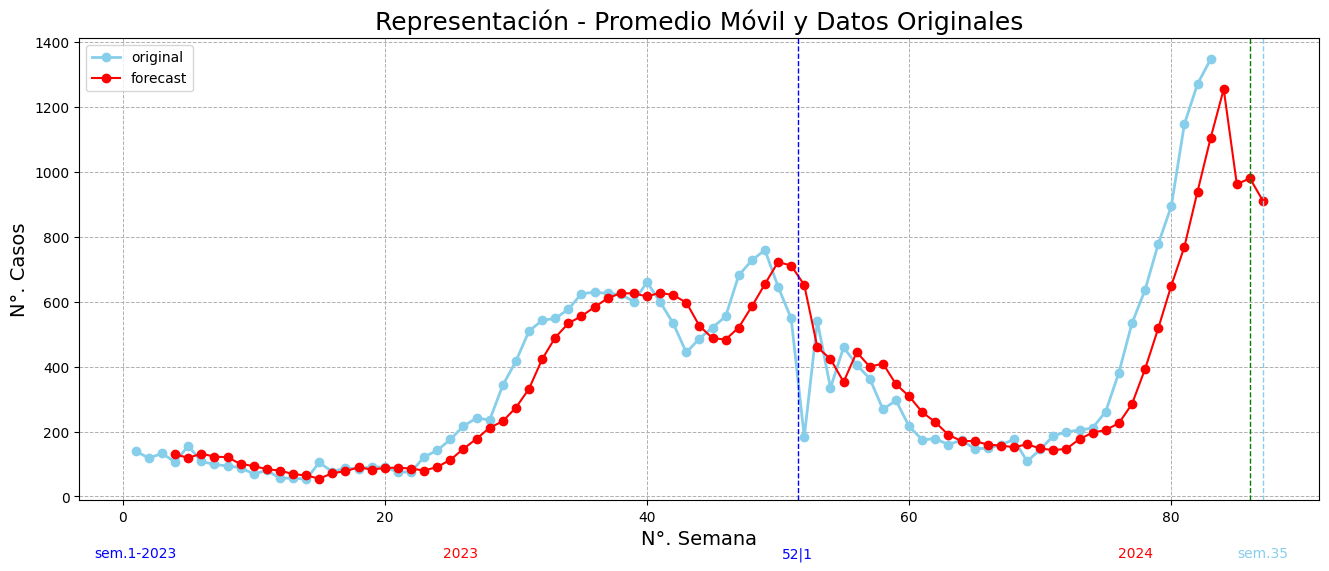

In [10]:
#Muestro en graficas estos datos

plt.figure(figsize=(16, 6))

# Graficar datos originales y forecast
plt.plot(df_dr['epiweek'][:-4], df_dr['denguecases'][:-4], '-o', color='skyblue', linewidth=2, label='original')
plt.plot(df_dr['epiweek'], df_dr['MA'], '-o', color='red', label='forecast')

# Asumimos que los datos son semanales y que el año cambia entre las semanas
last_index_2023 = df_dr[df_dr['epiweek'] == 53].index[-1]  # Índice de la última semana del 2023
first_index_2024 = df_dr[df_dr['epiweek'] >= 1].index[0]  # Índice de la primera semana del 2024

# Calcular la posición central entre ambos índices
transition_index = last_index_2023-0.5#(last_index_2023 + first_index_2024) / 2
transition_index1 = transition_index / 2
transition_index2 = transition_index + transition_index1

# Añadir línea vertical en la posición central
plt.axvline(x=transition_index, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=86, color='green', linestyle='--', linewidth=1)
plt.axvline(x=87, color='skyblue', linestyle='--', linewidth=1)

# Ajustar las posiciones de las etiquetas para que estén en la parte inferior del gráfico
plt.text(transition_index1, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2023', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index2, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2024', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '52|1', color='blue', ha='center', va='top', fontsize=10)
plt.text(df_dr['epiweek'].min(), plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.1-2023', color='blue', ha='center', va='top', fontsize=10)
plt.text(87, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.35', color='skyblue', ha='center', va='top', fontsize=10)

# Etiquetas y título
plt.xlabel("N°. Semana", fontsize=14)
plt.ylabel("N°. Casos", fontsize=14)
plt.title("Representación - Promedio Móvil y Datos Originales", fontsize=18)

# Graficar los puntos
#plt.scatter(df_dr['epiweek'], df_dr['denguecases'], color='black', s=25, zorder=5)

# Configurar la cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Mostrar la leyenda
plt.legend(loc='best')

# Mostrar el gráfico
plt.show()

In [11]:
#Buscamos el pronostico lo mismo que en excel peropara tres anios mas
#for n in range(3):
# df_dr.loc[len(df_dr)]=[int(df_dr.iloc[len(df_dr)-1][0])+1,0,0]
#df_dr
df_dr = pd.concat([df_dr, pd.DataFrame([[df_dr['epiweek'].iloc[-1] + 1 + i, 0, 0]
for i in range(3)], columns=df_dr.columns)], ignore_index=True)
df_dr


,epiweek,denguecases,MA
0,1,140,NaN
1,2,118,NaN
2,3,133,NaN
3,4,106,130.0
4,5,156,119.0
...,...,...,...
85,86,1138,981.0
86,87,0,911.0
87,88,0,0.0
88,89,0,0.0


In [12]:
#Ponosticamos para los demas anios...
df_dr['MA']=df_dr['denguecases'].rolling(window=3).mean().shift(1)

df_dr['epiweek']=df_dr['epiweek'].astype(int)
df_dr['denguecases']=df_dr['denguecases'].astype(float)
df_dr['MA']=df_dr['MA'].astype(float)
df_dr


,epiweek,denguecases,MA
0,1,140.0,NaN
1,2,118.0,NaN
2,3,133.0,NaN
3,4,106.0,130.333333
4,5,156.0,119.000000
...,...,...,...
85,86,1138.0,981.333333
86,87,0.0,911.333333
87,88,0.0,821.333333
88,89,0.0,379.333333


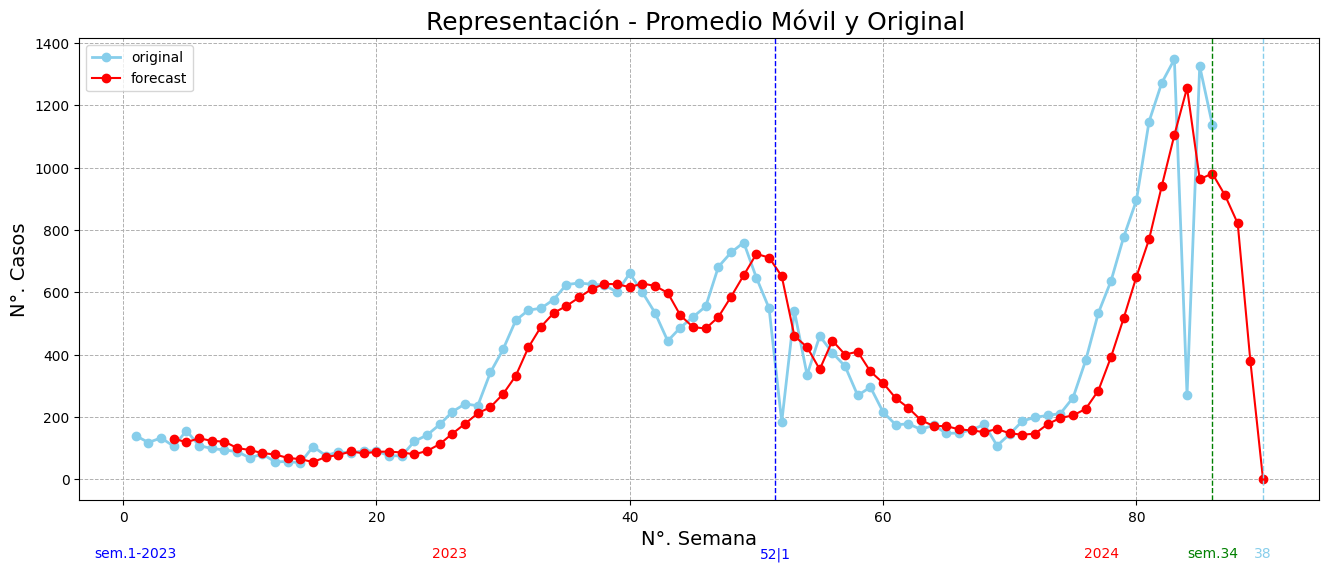

In [13]:
#Muestro en graficas estos datos

plt.figure(figsize=(16, 6))

# Graficar datos originales y forecast
#plt.plot(df_dr['epiweek'][:-1], df_dr['denguecases'][:-1], '-o', color='skyblue', linewidth=2, label='original')
#plt.plot(df_dr['epiweek'], df_dr['MA'], '-o', color='red', label='forecast')

plt.plot(df_dr['epiweek'][:-4], df_dr['denguecases'][:-4],'-o',  color='skyblue', linewidth=2, label='original')
plt.plot(df_dr['epiweek'], df_dr['MA'],'-o',  color='red', label='forecast')

# Asumimos que los datos son semanales y que el año cambia entre las semanas
last_index_2023 = df_dr[df_dr['epiweek'] == 53].index[-1]  # Índice de la última semana del 2023
first_index_2024 = df_dr[df_dr['epiweek'] >= 1].index[0]  # Índice de la primera semana del 2024

# Calcular la posición central entre ambos índices
transition_index = last_index_2023-0.5#(last_index_2023 + first_index_2024) / 2
transition_index1 = transition_index / 2
transition_index2 = transition_index + transition_index1

# Añadir línea vertical en la posición central
plt.axvline(x=transition_index, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=86, color='green', linestyle='--', linewidth=1)
plt.axvline(x=90, color='skyblue', linestyle='--', linewidth=1)

# Ajustar las posiciones de las etiquetas para que estén en la parte inferior del gráfico
plt.text(transition_index1, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2023', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index2, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2024', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '52|1', color='blue', ha='center', va='top', fontsize=10)
plt.text(df_dr['epiweek'].min(), plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.1-2023', color='blue', ha='center', va='top', fontsize=10)
plt.text(86, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.34', color='green', ha='center', va='top', fontsize=10)
plt.text(90, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '38', color='skyblue', ha='center', va='top', fontsize=10)

# Etiquetas y título
plt.xlabel("N°. Semana", fontsize=14)
plt.ylabel("N°. Casos", fontsize=14)
plt.title("Representación - Promedio Móvil y Original ", fontsize=18)

# Graficar los puntos
#plt.scatter(df_dr['epiweek'], df_dr['denguecases'], color='black', s=25, zorder=5)

# Configurar la cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Mostrar la leyenda
plt.legend(loc='best')

# Mostrar el gráfico
plt.show()

# No podemos graficar hasta -1 xq el set de datos llega a cero por lo tanto, como agregamos 3 -1 ahora es -4
#promedio movil empieza a caer incluso llega a cero..., deberiamos pronosticar solo hasta el periodo siguiente..


#**2. SUAVIZACION EXPONENCIAL []**

In [14]:
#Limpiamos desde el dataset original, y volvimos a calcular la media movil para tres periodos
df['epiweek'] = pd.to_numeric(df['epiweek'], errors='coerce')
#df['epiweek'] = pd.to_datetime(df['epiweek']).dt.year
d_dengue = df.groupby(by=['epiweek']).sum(numeric_only=True).reset_index()
d_dengue['MA']=d_dengue['denguecases'].rolling(window=3).mean().shift(1)
d_dengue

,epiweek,anio,denguecases,MA
0,1,2023,140,NaN
1,2,2023,118,NaN
2,3,2023,133,NaN
3,4,2023,106,130.333333
4,5,2023,156,119.000000
...,...,...,...,...
81,82,2024,1272,940.333333
82,83,2024,1348,1105.000000
83,84,2024,270,1256.000000
84,85,2024,1326,963.333333


Pronosticar usando suaviza. expo. y probar cual de los dos metodos es mejor:



1.   Media Movil
2.   Suavizacion exponencial



In [15]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [16]:
#mod = SimpleExpSmoothing(d_anual['value']).fit(smoothing_level=0.5, optimized=False)
mod = SimpleExpSmoothing(d_dengue['denguecases']).fit(optimized=True) # se le pide al met de funcion expo que busque los mejores parametros y logramos un mejor ajuste
#creamos un modelo (mod) usamos la libreria de funcion exponencial para los valores del dataframe d_anual uso la columna value y uso el
#metodo fit donde le doy una constante de suavizacion (lambda en 0.3)
d_dengue['ES'] = mod.fittedvalues #creo una nueva columna que se llama ES OSEA suavi.expo que va a tener los valores ajustados
d_dengue

#vemos los dos pronosticos de acuerdo a Media Movil y de acuerdo a Suavizacion Exponencial

,epiweek,anio,denguecases,MA,ES
0,1,2023,140,NaN,140.000000
1,2,2023,118,NaN,140.000000
2,3,2023,133,NaN,128.147433
3,4,2023,106,130.333333,130.761768
4,5,2023,156,119.000000,117.421290
...,...,...,...,...,...
81,82,2024,1272,940.333333,983.326759
82,83,2024,1348,1105.000000,1138.850353
83,84,2024,270,1256.000000,1251.530367
84,85,2024,1326,963.333333,722.727871


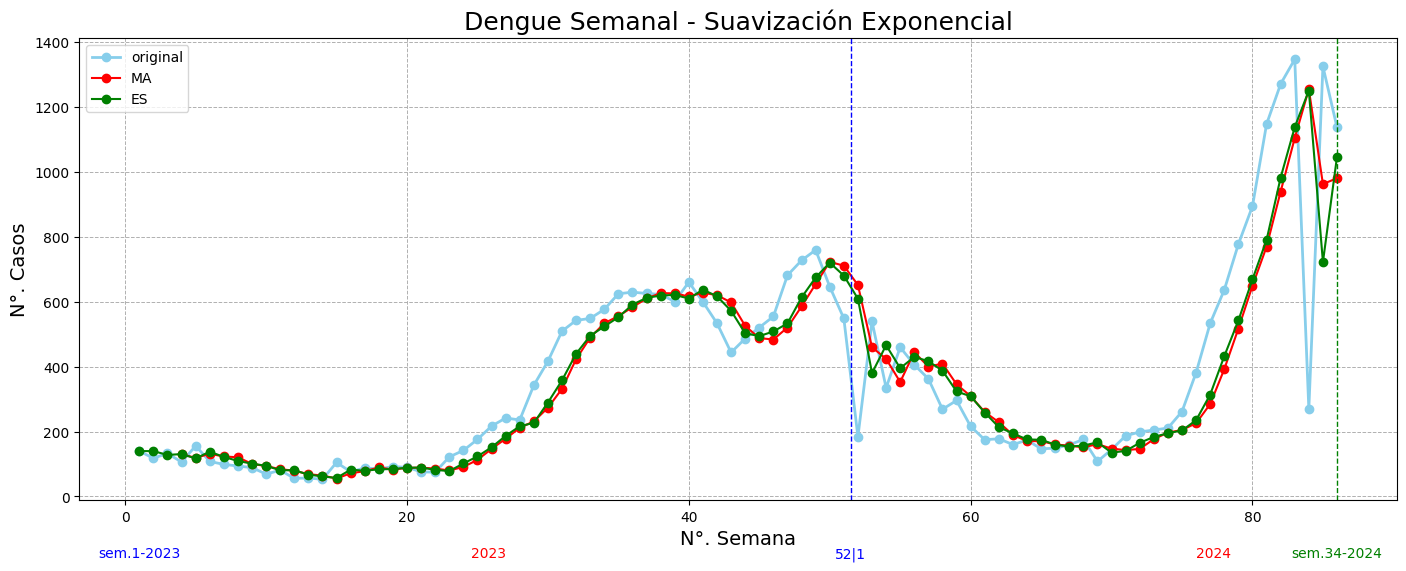

In [17]:
#Muestro en graficas estos datos

plt.figure(figsize=(17, 6))

# Graficar datos originales y forecast
#plt.plot(df_dr['epiweek'][:-1], df_dr['denguecases'][:-1], '-o', color='skyblue', linewidth=2, label='original')
#plt.plot(df_dr['epiweek'], df_dr['MA'], '-o', color='red', label='forecast')

#plt.plot(df_dr['epiweek'][:-4], df_dr['denguecases'][:-4],'-o',  color='skyblue', linewidth=2, label='original')
#plt.plot(df_dr['epiweek'], df_dr['MA'],'-o',  color='red', label='forecast')

plt.plot(d_dengue['epiweek'], d_dengue['denguecases'],'-o',  color='skyblue', linewidth=2, label='original')
plt.plot(d_dengue['epiweek'], d_dengue['MA'],'-o',  color='red', label='MA')
plt.plot(d_dengue['epiweek'], d_dengue['ES'],'-o',  color='green', label='ES')

# Asumimos que los datos son semanales y que el año cambia entre las semanas
last_index_2023 = df_dr[df_dr['epiweek'] == 53].index[-1]  # Índice de la última semana del 2023
first_index_2024 = df_dr[df_dr['epiweek'] >= 1].index[0]  # Índice de la primera semana del 2024

# Calcular la posición central entre ambos índices
transition_index = last_index_2023-0.5#(last_index_2023 + first_index_2024) / 2
transition_index1 = transition_index / 2
transition_index2 = transition_index + transition_index1

# Añadir línea vertical en la posición central
plt.axvline(x=transition_index, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=86, color='green', linestyle='--', linewidth=1)

# Ajustar las posiciones de las etiquetas para que estén en la parte inferior del gráfico
plt.text(transition_index1, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2023', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index2, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2024', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '52|1', color='blue', ha='center', va='top', fontsize=10)
plt.text(df_dr['epiweek'].min(), plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.1-2023', color='blue', ha='center', va='top', fontsize=10)
plt.text(86, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.34-2024', color='green', ha='center', va='top', fontsize=10)
# Etiquetas y título
plt.xlabel("N°. Semana", fontsize=14)
plt.ylabel("N°. Casos", fontsize=14)
plt.title("Dengue Semanal - Suavización Exponencial", fontsize=18)

# Graficar los puntos
#plt.scatter(df_dr['epiweek'], df_dr['denguecases'], color='black', s=25, zorder=5)

# Configurar la cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Mostrar la leyenda
plt.legend(loc='best')

# Mostrar el gráfico
plt.show()

# No podemos graficar hasta -1 xq el set de datos llega a cero por lo tanto, como agregamos 3 -1 ahora es -4
#promedio movil empieza a caer incluso llega a cero..., deberiamos pronosticar solo hasta el anio siguiente..


**ERRORES LIBRERIA SKLEARN**

In [18]:
#importamos MSE
from sklearn.metrics import mean_squared_error as MSE

#Para calcular el error vamos a necesitar:
1. Cuales son los datos
2. Calcular es el pronostico con media movil
3. Calcular el el pronostico con suav. exponencial

In [19]:
y_true = d_dengue['denguecases']
y_pred_ma = d_dengue['MA']
y_pred_es = d_dengue['ES']

In [20]:
#MSE de la media movil
MSE(y_true[3:], y_pred_ma.dropna()) # para que no me agarre los NAN trunco de 3 en adelante y dropna pa eliminar

27304.220883534137

In [21]:
#MSE de la Suaviz. exponencial
MSE(y_true, y_pred_es)

26506.829292778646

In [22]:
mod.summary()

#se ve el valor optimo de alpha y la inicializacion

Dep. Variable:,denguecases,No. Observations:,86
Model:,SimpleExpSmoothing,SSE,2279587.319
Optimized:,True,AIC,879.924
Trend:,None,BIC,884.832
Seasonal:,None,AICC,880.417
Seasonal Periods:,None,Date:,"Tue, 10 Sep 2024"
Box-Cox:,False,Time:,02:31:19
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5387531,alpha,True
initial_level,140.00000,l.0,False


In [23]:
mod.params_formatted

,name,param,optimized
smoothing_level,alpha,0.538753,True
initial_level,l.0,140.000000,False


#para pronosticar el siguiente valor, esta en mod la información cuando cree el método de suavexpon. voy a usarla para buscar la predicción

FORECAST - SUAVIZADO EXPONENCIAL

In [24]:
pred = mod.forecast(10)
pred

,0
86,1096.369042
87,1096.369042
88,1096.369042
89,1096.369042
90,1096.369042
91,1096.369042
92,1096.369042
93,1096.369042
94,1096.369042
95,1096.369042


In [25]:
# creo una nueva serie para visualizar la grafica
expo_s = pd.concat([d_dengue['ES'],pred])
expo_s

,0
0,140.000000
1,140.000000
2,128.147433
3,130.761768
4,117.421290
...,...
91,1096.369042
92,1096.369042
93,1096.369042
94,1096.369042


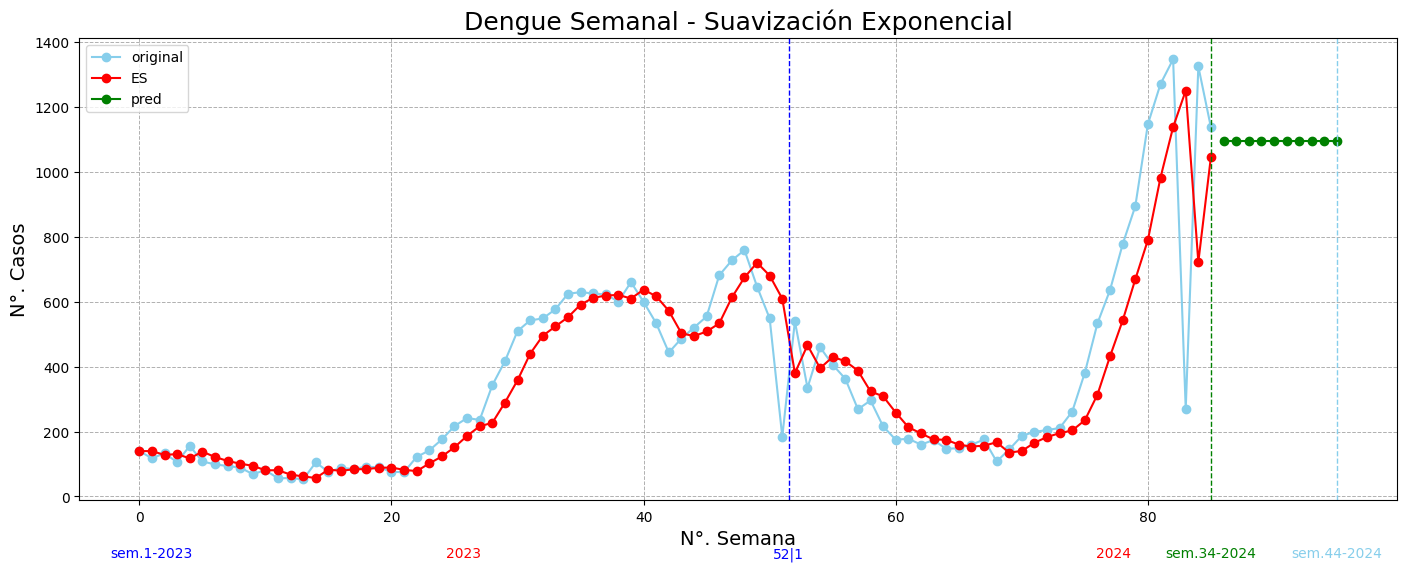

In [26]:
#Muestro en graficas estos datos

plt.figure(figsize=(17, 6))

# Graficar datos originales y forecast
plt.plot(d_dengue.index, d_dengue['denguecases'],'-o',  color='skyblue', label='original')
plt.plot(d_dengue.index, d_dengue['ES'],'-o',  color='red', label='ES')
plt.plot(pred,'-o',  color='green', label='pred')


# Asumimos que los datos son semanales y que el año cambia entre las semanas
last_index_2023 = df_dr[df_dr['epiweek'] == 53].index[-1]  # Índice de la última semana del 2023
first_index_2024 = df_dr[df_dr['epiweek'] >= 1].index[0]  # Índice de la primera semana del 2024

# Calcular la posición central entre ambos índices
transition_index = last_index_2023-0.5#(last_index_2023 + first_index_2024) / 2
transition_index1 = transition_index / 2
transition_index2 = transition_index + transition_index1

# Añadir línea vertical en la posición central
plt.axvline(x=transition_index, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=85, color='green', linestyle='--', linewidth=1)
plt.axvline(x=95, color='skyblue', linestyle='--', linewidth=1)

# Ajustar las posiciones de las etiquetas para que estén en la parte inferior del gráfico
plt.text(transition_index1, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2023', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index2, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2024', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '52|1', color='blue', ha='center', va='top', fontsize=10)
plt.text(df_dr['epiweek'].min(), plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.1-2023', color='blue', ha='center', va='top', fontsize=10)
plt.text(85, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.34-2024', color='green', ha='center', va='top', fontsize=10)
plt.text(95, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.44-2024', color='skyblue', ha='center', va='top', fontsize=10)

# Etiquetas y título
plt.xlabel("N°. Semana", fontsize=14)
plt.ylabel("N°. Casos", fontsize=14)
plt.title("Dengue Semanal - Suavización Exponencial", fontsize=18)

# Graficar los puntos
#plt.scatter(df_dr['epiweek'], df_dr['denguecases'], color='black', s=25, zorder=5)

# Configurar la cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Mostrar la leyenda
plt.legend(loc='best')

# Mostrar el gráfico
plt.show()

# Gráfica de Suavización incluyendo la predicción

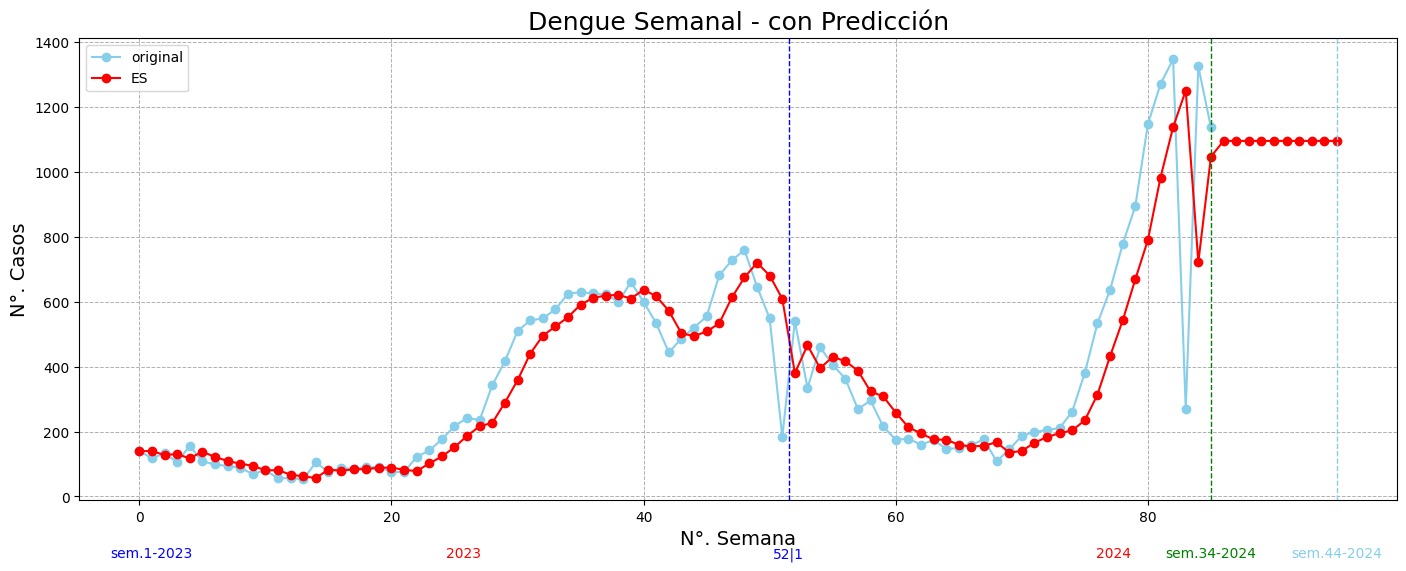

In [27]:
#Grafico

plt.figure(figsize=(17, 6))

# Graficar datos originales y forecast
plt.plot(d_dengue.index, d_dengue['denguecases'],'-o',  color='skyblue', label='original')
plt.plot(expo_s,'-o',  color='red', label='ES')


# Asumimos que los datos son semanales y que el año cambia entre las semanas
last_index_2023 = df_dr[df_dr['epiweek'] == 53].index[-1]  # Índice de la última semana del 2023
first_index_2024 = df_dr[df_dr['epiweek'] >= 1].index[0]  # Índice de la primera semana del 2024

# Calcular la posición central entre ambos índices
transition_index = last_index_2023-0.5#(last_index_2023 + first_index_2024) / 2
transition_index1 = transition_index / 2
transition_index2 = transition_index + transition_index1

# Añadir línea vertical en la posición central
plt.axvline(x=transition_index, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=85, color='green', linestyle='--', linewidth=1)
plt.axvline(x=95, color='skyblue', linestyle='--', linewidth=1)

# Ajustar las posiciones de las etiquetas para que estén en la parte inferior del gráfico
plt.text(transition_index1, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2023', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index2, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2024', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '52|1', color='blue', ha='center', va='top', fontsize=10)
plt.text(df_dr['epiweek'].min(), plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.1-2023', color='blue', ha='center', va='top', fontsize=10)
plt.text(85, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.34-2024', color='green', ha='center', va='top', fontsize=10)
plt.text(95, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.44-2024', color='skyblue', ha='center', va='top', fontsize=10)

# Etiquetas y título
plt.xlabel("N°. Semana", fontsize=14)
plt.ylabel("N°. Casos", fontsize=14)
plt.title("Dengue Semanal - con Predicción", fontsize=18)

# Configurar la cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Mostrar la leyenda
plt.legend(loc='best')

# Mostrar el gráfico
plt.show()

#TODO ESTO ES EL PASO A PASO RESUMIENDO PODEMOS HACER

In [28]:
# data original la traemos
df

,epiweek,anio,denguecases,MA
0,1,2023,140,NaN
1,2,2023,118,NaN
2,3,2023,133,NaN
3,4,2023,106,130.333333
4,5,2023,156,119.000000
...,...,...,...,...
81,82,2024,1272,940.333333
82,83,2024,1348,1105.000000
83,84,2024,270,1256.000000
84,85,2024,1326,963.333333


In [29]:
#Calculamos el Forecast

mod = SimpleExpSmoothing(df['denguecases']).fit(smoothing_level=0.5, optimized=False)
#creamos la nueva columna
df['ES']=mod.fittedvalues
#creamos la prediccion
pred=mod.forecast(5)

#juntamos la serie de tiempo
expo_s=pd.concat([df['ES'],pred])


In [30]:
#Calculamos los errores
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

print("MSE: ", MSE(df['denguecases'],df['ES']))
print("MAPE: ", MAPE(df['denguecases'],df['ES']))
#

MSE:  26584.590938416368
MAPE:  0.26190640301942547


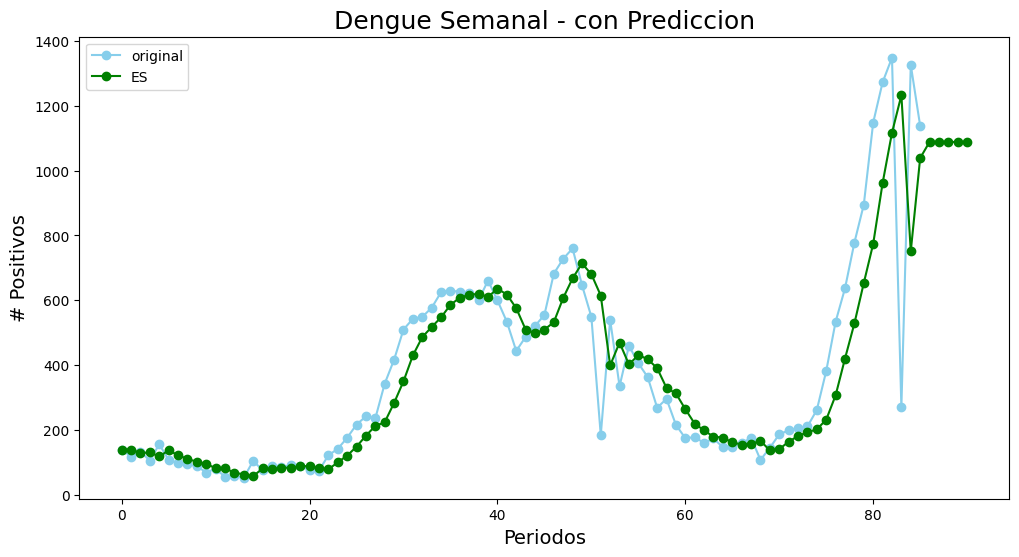

In [31]:
#ahora graficamos
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['denguecases'],'-o',  color='skyblue', label='original')
plt.plot(expo_s,'-o',  color='green', label='ES')

plt.xlabel("Periodos", fontsize=14)
plt.ylabel("# Positivos", fontsize=14)
plt.title("Dengue Semanal - con Prediccion", fontsize=18)
plt.legend(loc='best')
plt.show()

# desde la data inicial, aunque este no es el mejor metodo

#HOLT-WINTER

In [32]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter('ignore', ConvergenceWarning)

from statsmodels.tsa.api import SimpleExpSmoothing,Holt,ExponentialSmoothing

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

 **Cargando el datafile**

In [33]:
df = pd.read_csv('/content/df_dengue_pty.csv')#,parse_dates=['date'],index_col=['date'])
#Mostrando un preview de la data contenida en el archivo
df.head()

,epiweek,anio,denguecases
0,1,2023,140
1,2,2023,118
2,3,2023,133
3,4,2023,106
4,5,2023,156


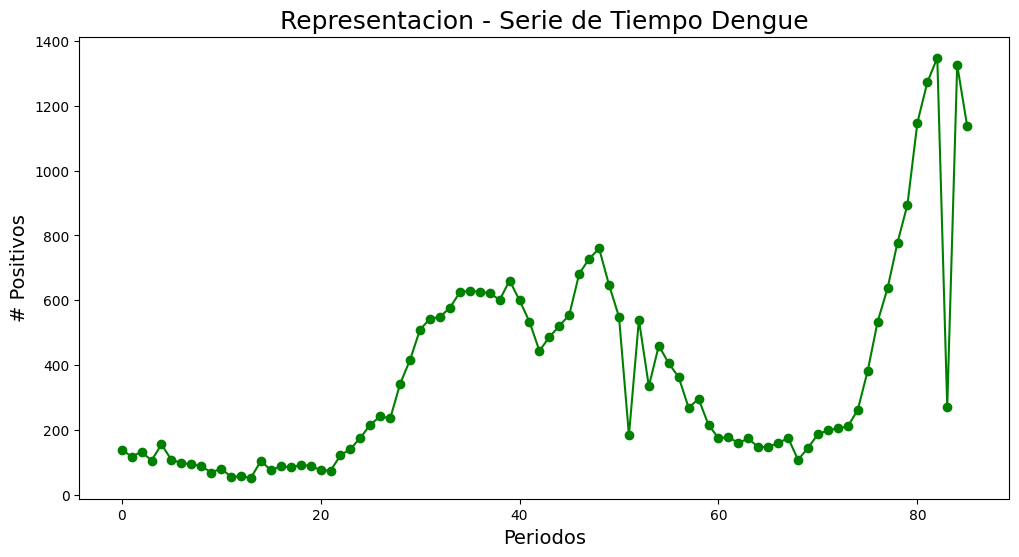

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['denguecases'],'-o', color='green')

plt.xlabel("Periodos", fontsize=14)
plt.ylabel("# Positivos", fontsize=14)
plt.title("Representacion - Serie de Tiempo Dengue", fontsize=18)
plt.show()

**Forecast**

In [35]:
#Pronosticando suav expo. simple
mod_es = SimpleExpSmoothing(df['denguecases']).fit(optimized=True)
#mod_es = SimpleExpSmoothing(df['value']).fit(smoothing_level=0.5, optimized=False)
df['ES']=mod_es.fittedvalues
pred_es = mod_es.forecast(10)
expo_s=pd.concat([df['ES'],pred_es])

mod_holt = Holt(df['denguecases']).fit(optimized=True)
#mod_holt = Holt(df['value']).fit(smoothing_level=0.5, smoothing_slope=0.5)
df['Holt']=mod_holt.fittedvalues
pred_holt = mod_holt.forecast(10)
expo_holt=pd.concat([df['Holt'],pred_holt])

In [36]:
#Buscando los errores
print("MSE ES: ", MSE(df['denguecases'],df['ES']))
print("MAPE ES: ", MAPE(df['denguecases'],df['ES']))

print("MSE Holt: ", MSE(df['denguecases'],df['Holt']))
print("MAPE Holt: ", MAPE(df['denguecases'],df['Holt']))  #el mejor modelo segun veohasta ahora

MSE ES:  26506.829292778646
MAPE ES:  0.25594234784761977
MSE Holt:  26386.205449334786
MAPE Holt:  0.26208875764595946


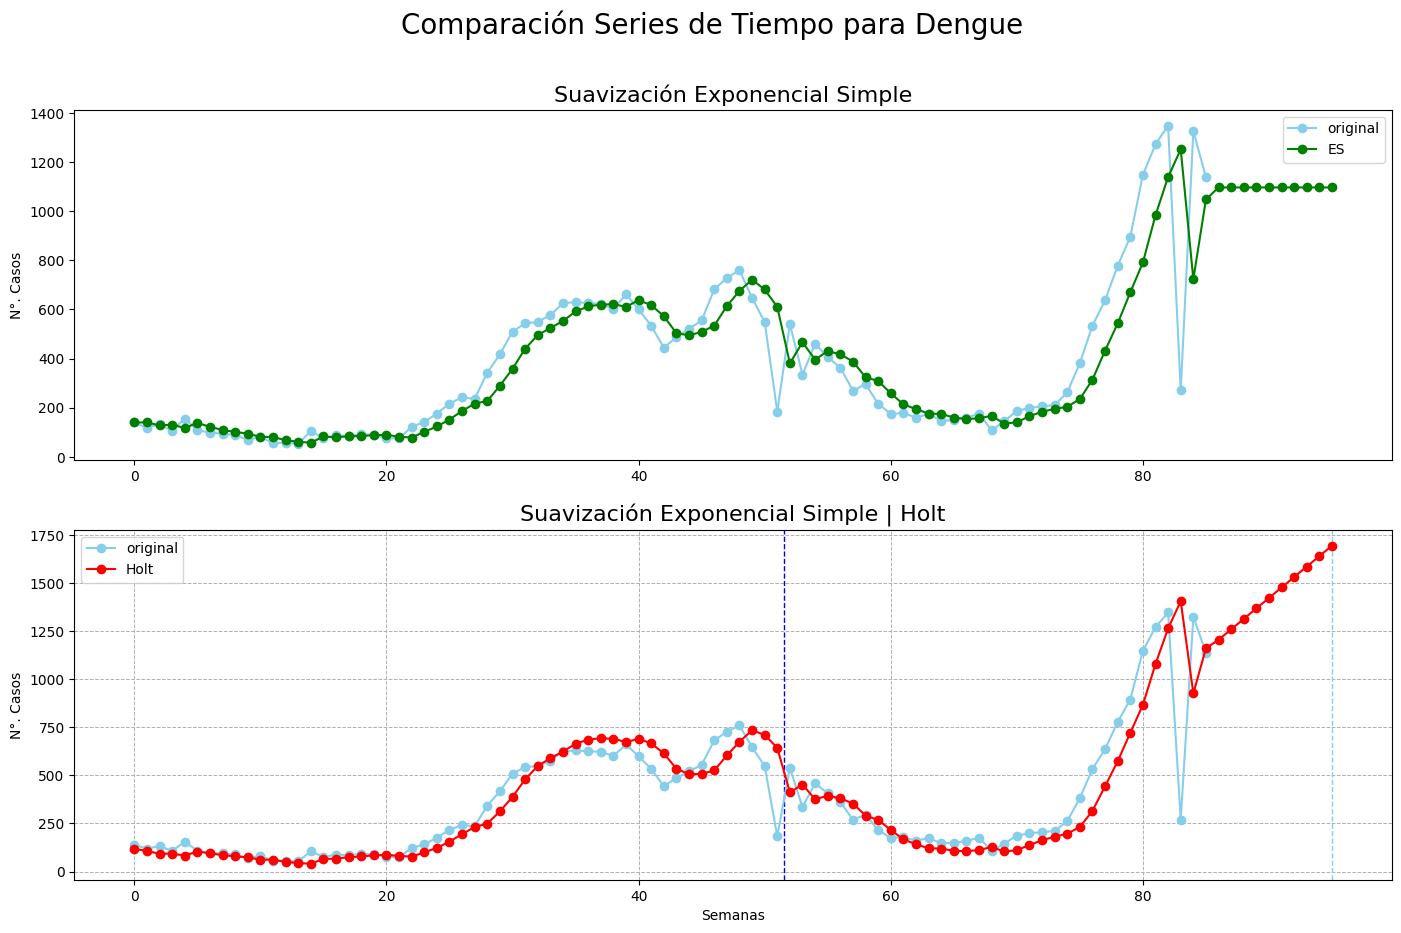

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(17, 10))
fig.suptitle('Comparación Series de Tiempo para Dengue', fontsize=20)

ax1.plot(df.index, df['denguecases'],'-o',  color='skyblue', label='original')
ax1.plot(expo_s,'-o',  color='green', label='ES')
last_index_2023 = d_dengue[d_dengue['anio'] == 2023].index[-1]
first_index_2024 = d_dengue[d_dengue['anio'] == 2024].index[0]

# Añadir línea vertical en la posición central
plt.axvline(x=transition_index, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=95, color='skyblue', linestyle='--', linewidth=1)
#plt.axvline(x=last_index_2024, color='green', linestyle='--', linewidth=1)
ax1.set_title('Suavización Exponencial Simple', fontsize=16)
ax1.set(xlabel='', ylabel='N°. Casos')
ax1.legend(loc='best')

plt.grid(True, which='both', linestyle='--', linewidth=0.7)
ax2.plot(df.index, df['denguecases'],'-o',  color='skyblue', label='original')
ax2.plot(expo_holt,'-o',  color='red', label='Holt')
ax2.set_title('Suavización Exponencial Simple | Holt', fontsize=16)
ax2.set(xlabel='Semanas', ylabel='N°. Casos')
ax2.legend(loc='best')


plt.show()

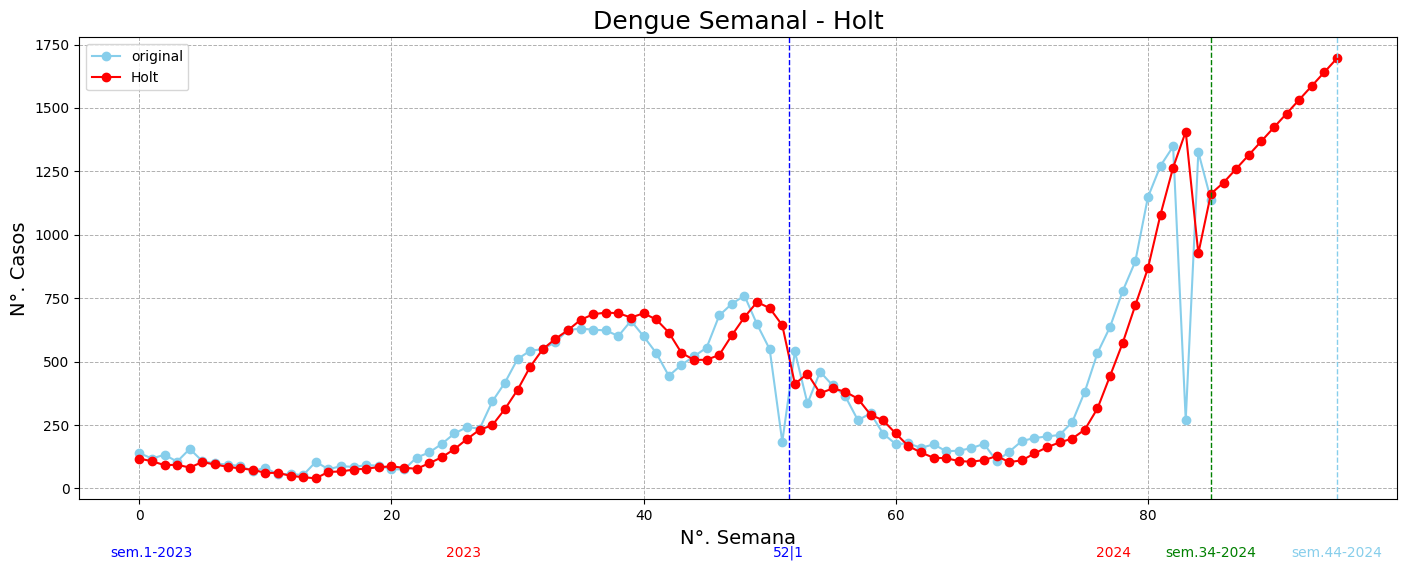

In [38]:
#Grafico

plt.figure(figsize=(17, 6))

#plt.plot(d_dengue['epiweek'], d_dengue['denguecases'],'-o',  color='skyblue', linewidth=2, label='original')
#plt.plot(d_dengue['epiweek'], d_dengue['MA'],'-o',  color='red', label='MA')
#plt.plot(d_dengue['epiweek'], d_dengue['ES'],'-o',  color='green', label='ES')

#plt.plot(df['denguecases'],'-o',  color='black', label='original')
#plt.plot(expo_w,'-o',  color='pink', label='Holt-Winter')

plt.plot(df['denguecases'],'-o',  color='skyblue', label='original')
plt.plot(expo_holt,'-o',  color='red', label='Holt')

# Asumimos que los datos son semanales y que el año cambia entre las semanas
last_index_2023 = df_dr[df_dr['epiweek'] == 53].index[-1]  # Índice de la última semana del 2023
#first_index_2024 = df_dr[df_dr['epiweek'] >= 1].index[0]  # Índice de la primera semana del 2024
last_index_2024 = df_dr[df_dr['epiweek'] ==86].index[0]

# Calcular la posición central entre ambos índices
transition_index = last_index_2023-0.5#(last_index_2023 + first_index_2024) / 2
transition_index1 = transition_index / 2
transition_index2 = transition_index + transition_index1

# Añadir línea vertical en la posición central
plt.axvline(x=transition_index, color='blue', linestyle='--', linewidth=1)

plt.axvline(x=last_index_2024, color='green', linestyle='--', linewidth=1)

plt.axvline(x=95, color='skyblue', linestyle='--', linewidth=1)

# Ajustar las posiciones de las etiquetas para que estén en la parte inferior del gráfico
plt.text(transition_index1, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2023', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index2, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2024', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '52|1', color='blue', ha='center', va='top', fontsize=10)
plt.text(df_dr['epiweek'].min(), plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.1-2023', color='blue', ha='center', va='top', fontsize=10)
plt.text(last_index_2024, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.34-2024', color='green', ha='center', va='top', fontsize=10)
plt.text(95, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.44-2024', color='skyblue', ha='center', va='top', fontsize=10)

# Etiquetas y título
plt.xlabel("N°. Semana", fontsize=14)
plt.ylabel("N°. Casos", fontsize=14)
plt.title("Dengue Semanal - Holt", fontsize=18)

# Graficar los puntos
#plt.scatter(df_dr['epiweek'], df_dr['denguecases'], color='black', s=25, zorder=5)

# Configurar la cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Mostrar la leyenda
plt.legend(loc='best')

# Mostrar el gráfico
plt.show()

In [39]:
expo_holt

,0
0,118.000000
1,107.313302
2,92.255465
3,93.357311
4,82.687220
...,...
91,1477.836317
92,1532.289583
93,1586.742850
94,1641.196116


In [40]:
#df1=['.',['.']]
#print(pd.concat([expo_holt.head(11),expo_holt.tail(11)]).to_string(index=False, header=False))
expo_holt.tail(15)

,0
81,1079.673877
82,1264.974582
83,1406.714920
84,926.674181
85,1161.783082
86,1205.569986
87,1260.023252
88,1314.476518
89,1368.929784
90,1423.383051


#Calcular método de Holt y Comparandolo con winter

#Determinando estacionalidad | Metodo de Holt

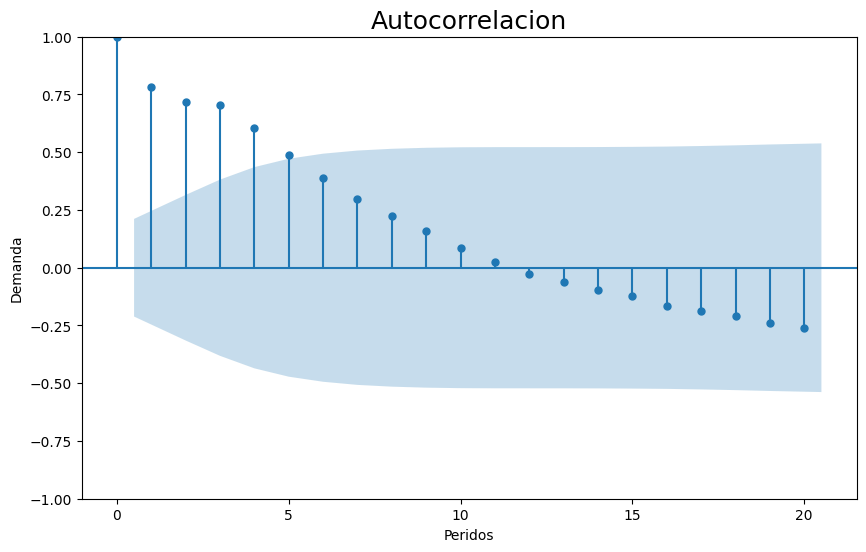

In [41]:
from statsmodels.graphics.tsaplots import plot_acf  # para los graficos de autocorrelaciones

plt.rc("figure", figsize=(10, 6)) # definimos el tamano
plot_acf(df['denguecases'].values, fft=1)

plt.title("Autocorrelacion", fontsize=18)
plt.xlabel("Peridos")
plt.ylabel("Demanda")
plt.show()


In [42]:
mod_w=ExponentialSmoothing(df['denguecases'],trend='add',seasonal='add',seasonal_periods=3).fit(optimized=1)
#Guardo los valores pronosticados
df['Winter']=mod_w.fittedvalues
#crear la prediccion
pred_w=mod_w.forecast(10)
#concatenamos
expo_w=pd.concat([df['Winter'],pred_w])

In [43]:
#parametros
mod_w.params_formatted


,name,param,optimized
smoothing_level,alpha,0.448370,True
smoothing_trend,beta,0.129871,True
smoothing_seasonal,gamma,0.050956,True
initial_level,l.0,143.355479,True
initial_trend,b.0,-1.897247,True
initial_seasons.0,s.0,2.193783,True
initial_seasons.1,s.1,10.707681,True
initial_seasons.2,s.2,-13.991559,True


In [44]:
#Calculo los errores del modelo
print("ESTIMACIONES DE ERROR DE LOS PRONÓSTICOS:")
print(" ")
print("MSE ES: ", MSE(df['denguecases'],df['ES']))
print("MAPE ES: ", MAPE(df['denguecases'],df['ES']))
print(" ")

print("MSE Holt: ", MSE(df['denguecases'],df['Holt']))
print("MAPE Holt: ", MAPE(df['denguecases'],df['Holt']))
print(" ")
print("MSE Winter: ", MSE(df['denguecases'],df['Winter']))
print("MAPE Winter: ", MAPE(df['denguecases'],df['Winter']))


ESTIMACIONES DE ERROR DE LOS PRONÓSTICOS:
 
MSE ES:  26506.829292778646
MAPE ES:  0.25594234784761977
 
MSE Holt:  26386.205449334786
MAPE Holt:  0.26208875764595946
 
MSE Winter:  26181.818398878277
MAPE Winter:  0.25966050005683905


In [45]:
d_dengue

,epiweek,anio,denguecases,MA,ES
0,1,2023,140,NaN,140.000000
1,2,2023,118,NaN,140.000000
2,3,2023,133,NaN,128.147433
3,4,2023,106,130.333333,130.761768
4,5,2023,156,119.000000,117.421290
...,...,...,...,...,...
81,82,2024,1272,940.333333,983.326759
82,83,2024,1348,1105.000000,1138.850353
83,84,2024,270,1256.000000,1251.530367
84,85,2024,1326,963.333333,722.727871


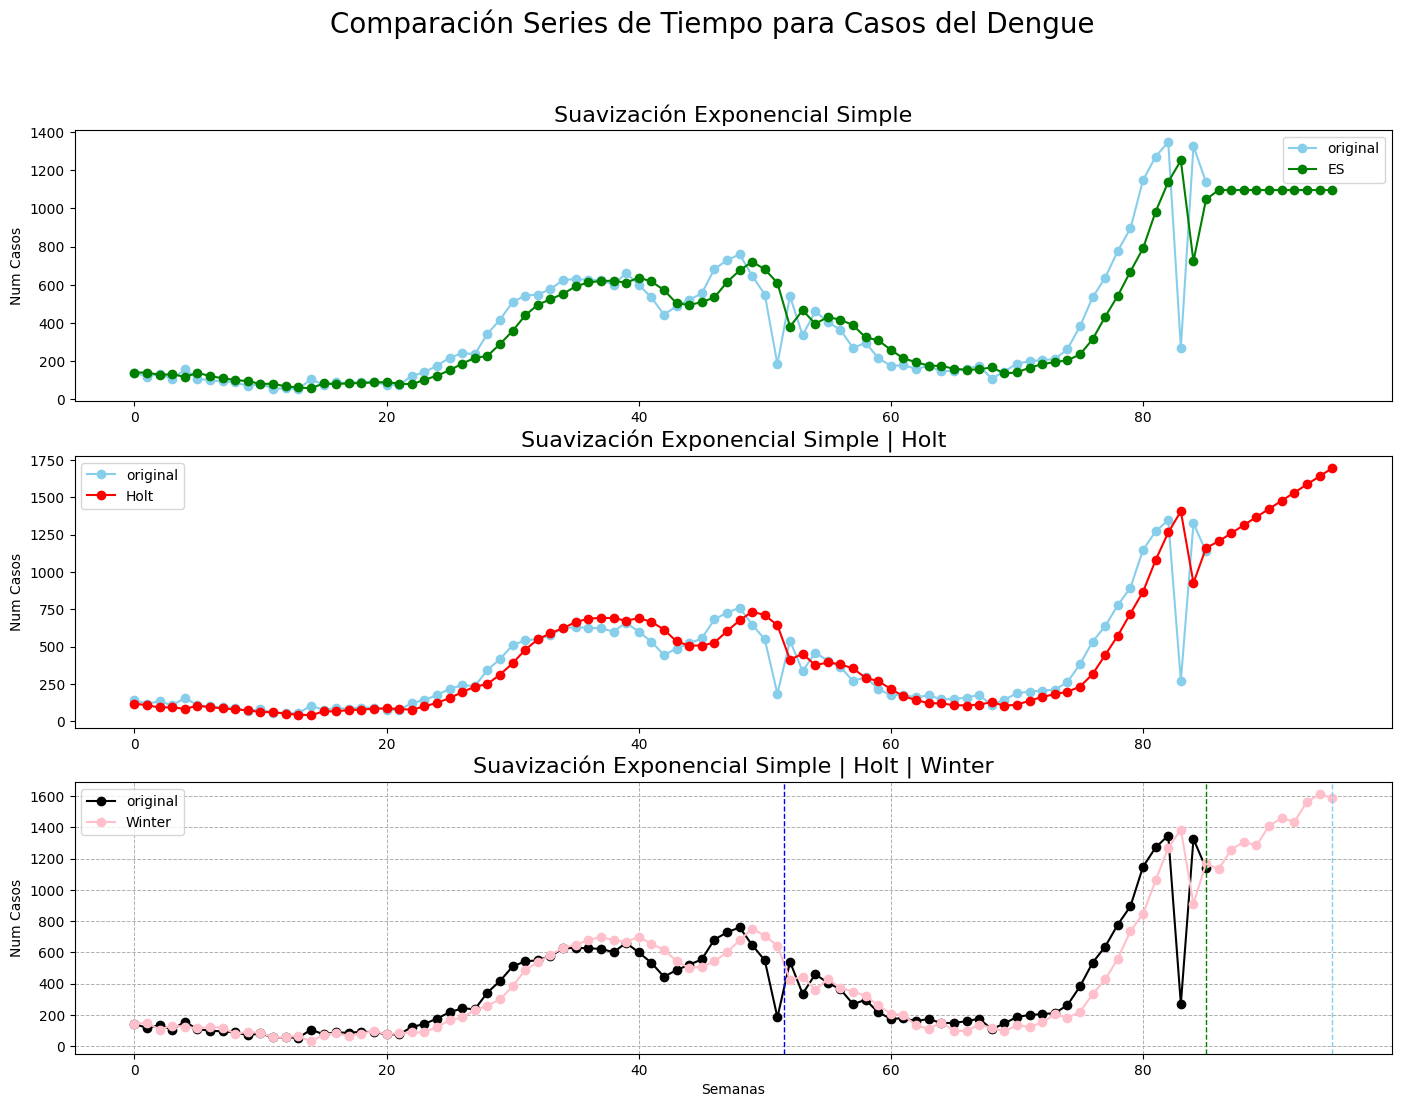

In [46]:
#Mismo grafico pero le agregamos una tercera axis

fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(17, 12))
fig.suptitle('Comparación Series de Tiempo para Casos del Dengue', fontsize=20)

ax1.plot(df.index, df['denguecases'],'-o',  color='skyblue', label='original')
ax1.plot(expo_s,'-o',  color='green', label='ES')
ax1.set_title('Suavización Exponencial Simple', fontsize=16)
ax1.set(xlabel='', ylabel='Num Casos')
ax1.legend(loc='best')

ax2.plot(df.index, df['denguecases'],'-o',  color='skyblue', label='original')
ax2.plot(expo_holt,'-o',  color='red', label='Holt')
ax2.set_title('Suavización Exponencial Simple | Holt', fontsize=16)
ax2.set(xlabel='', ylabel='Num Casos')
ax2.legend(loc='best')

ax3.plot(df.index, df['denguecases'],'-o',  color='black', label='original')
ax3.plot(expo_w,'-o',  color='pink', label='Winter')
ax3.set_title('Suavización Exponencial Simple | Holt | Winter', fontsize=16)
ax3.set(xlabel='Semanas', ylabel='Num Casos')
ax3.legend(loc='best')

last_index_2023 = d_dengue[d_dengue['anio'] == 2023].index[-1]
first_index_2024 = d_dengue[d_dengue['anio'] == 2024].index[0]

# Añadir línea vertical en la posición central
plt.axvline(x=transition_index, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=95, color='skyblue', linestyle='--', linewidth=1)
plt.axvline(x=last_index_2024, color='green', linestyle='--', linewidth=1)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.subplots_adjust(wspace=0.84)
plt.show()

#Reflejado como Holt-Winter tiene un mejor ajuste

In [47]:
#plt.figure(figsize=(17, 6))
#plt.plot(df.index+1,df['denguecases'],'-o',  color='black', label='original')
#plt.plot(expo_w,'-o',  color='pink', label='Holt-Winter')
#
#plt.xlabel("Periodos", fontsize=14)
#plt.ylabel("# Positivos", fontsize=14)
#plt.title("Serie de Tiempo Dengue Anual con Prediccion", fontsize=18)
#plt.legend(loc='best')
#plt.show()
#
##la prediccion no toma pendientes ni picos grandes sino que sigue su factor estacional para los proximos anios

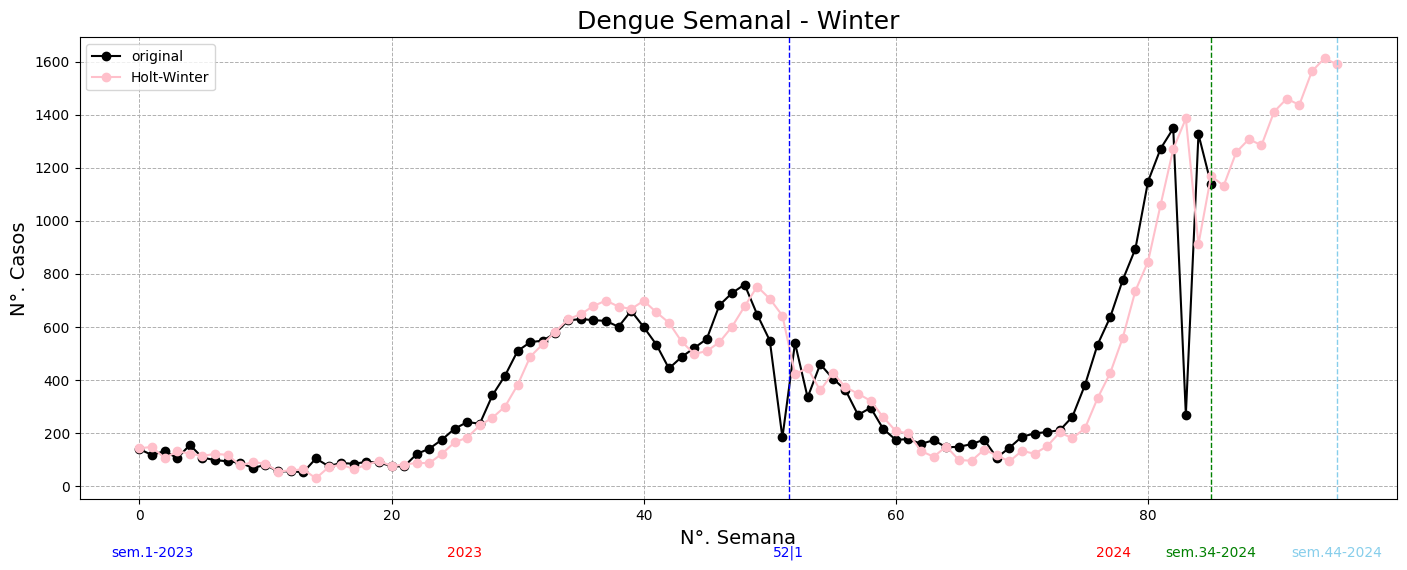

In [48]:


#Grafico

plt.figure(figsize=(17, 6))

#plt.plot(d_dengue['epiweek'], d_dengue['denguecases'],'-o',  color='skyblue', linewidth=2, label='original')
#plt.plot(d_dengue['epiweek'], d_dengue['MA'],'-o',  color='red', label='MA')
#plt.plot(d_dengue['epiweek'], d_dengue['ES'],'-o',  color='green', label='ES')

plt.plot(df['denguecases'],'-o',  color='black', label='original')
plt.plot(expo_w,'-o',  color='pink', label='Holt-Winter')


# Asumimos que los datos son semanales y que el año cambia entre las semanas
last_index_2023 = df_dr[df_dr['epiweek'] == 53].index[-1]  # Índice de la última semana del 2023
#first_index_2024 = df_dr[df_dr['epiweek'] >= 1].index[0]  # Índice de la primera semana del 2024
last_index_2024 = df_dr[df_dr['epiweek'] ==86].index[0]

# Calcular la posición central entre ambos índices
transition_index = last_index_2023-0.5#(last_index_2023 + first_index_2024) / 2
transition_index1 = transition_index / 2
transition_index2 = transition_index + transition_index1

# Añadir línea vertical en la posición central
plt.axvline(x=transition_index, color='blue', linestyle='--', linewidth=1)

plt.axvline(x=last_index_2024, color='green', linestyle='--', linewidth=1)

plt.axvline(x=95, color='skyblue', linestyle='--', linewidth=1)

# Ajustar las posiciones de las etiquetas para que estén en la parte inferior del gráfico
plt.text(transition_index1, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2023', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index2, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '2024', color='red', ha='center', va='top', fontsize=10)
plt.text(transition_index, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         '52|1', color='blue', ha='center', va='top', fontsize=10)
plt.text(df_dr['epiweek'].min(), plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.1-2023', color='blue', ha='center', va='top', fontsize=10)
plt.text(last_index_2024, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.34-2024', color='green', ha='center', va='top', fontsize=10)
plt.text(95, plt.gca().get_ylim()[0] - 0.1 * (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]),
         'sem.44-2024', color='skyblue', ha='center', va='top', fontsize=10)

# Etiquetas y título
plt.xlabel("N°. Semana", fontsize=14)
plt.ylabel("N°. Casos", fontsize=14)
plt.title("Dengue Semanal - Winter", fontsize=18)

# Graficar los puntos
#plt.scatter(df_dr['epiweek'], df_dr['denguecases'], color='black', s=25, zorder=5)

# Configurar la cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Mostrar la leyenda
plt.legend(loc='best')

# Mostrar el gráfico
plt.show()


In [49]:
last_index_2024


85

In [50]:
print(expo_w.to_string())

0      143.652014
1      148.418554
2      106.199357
3      131.894638
4      123.605806
5      114.404720
6      122.532080
7      118.415819
8       78.600810
9       91.203327
10      85.528711
11      55.453461
12      60.452257
13      63.652783
14      30.300783
15      71.872075
16      82.074226
17      65.439949
18      80.416857
19      96.211851
20      76.281933
21      82.252170
22      87.894777
23      87.891240
24     122.607888
25     165.794751
26     183.719152
27     229.754357
28     258.429801
29     300.356530
30     381.988681
31     488.422185
32     535.959937
33     583.110207
34     629.247337
35     648.449246
36     678.827399
37     699.715081
38     677.083349
39     667.894673
40     698.861028
41     655.743376
42     616.360374
43     545.568166
44     498.814469
45     509.230492
46     542.586227
47     600.791754
48     677.689206
49     752.519154
50     706.338057
51     642.852379
52     423.444504
53     445.100703
54     361.087615
55     427

In [51]:
print(pd.concat([expo_w.head(10),expo_w.tail(10)]).to_string(index=False, header=False))

 143.652014
 148.418554
 106.199357
 131.894638
 123.605806
 114.404720
 122.532080
 118.415819
  78.600810
  91.203327
1132.103260
1258.732191
1307.494180
1284.421325
1411.050256
1459.812245
1436.739391
1563.368321
1612.130310
1589.057456


In [52]:
#mod.params_formatted
#mod_es.params_formatted

#mod_w.params_formatted


#mod_holt.params_formatted

predh=mod_holt.forecast(10)

predh

,0
86,1205.569986
87,1260.023252
88,1314.476518
89,1368.929784
90,1423.383051
91,1477.836317
92,1532.289583
93,1586.742850
94,1641.196116
95,1695.649382


In [53]:
pred_w=mod_w.forecast(10)
pred_w

,0
86,1132.103260
87,1258.732191
88,1307.494180
89,1284.421325
90,1411.050256
91,1459.812245
92,1436.739391
93,1563.368321
94,1612.130310
95,1589.057456
